In [1]:
import time
from sympleq.models.random_hamiltonian import random_gate_symmetric_hamiltonian
from sympleq.core.circuits import SWAP, Hadamard, SUM, PHASE
from sympleq.core.symmetries.clifford import find_clifford_symmetries  #, qudit_cost, min_qudit_clifford_symmetry
from sympleq.core.circuits import Circuit
import numpy as np

In [ ]:
n_tests = 100
p = 2
n_qudits_list = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]  # 

times = []

for n_qudits in n_qudits_list:
    t_each_run = []
    n_paulis = n_qudits * 3 + 10
        
    for _ in range(n_tests):
        
        sym = SWAP(0, 1, p)
        # unscrambled H
        H = random_gate_symmetric_hamiltonian(sym, n_qudits, n_paulis, scrambled=False)
        C = Circuit.from_random(1000, H.dimensions).composite_gate()  # scrambling circuit
        H = C.act(H)
        H.weight_to_phase()
        scrambled_sym = Circuit(H.dimensions, [C.inv(), sym, C]).composite_gate()
        # assert H.to_standard_form() == scrambled_sym.act(H).to_standard_form(
        # ), f"\n{H.to_standard_form().__str__()}\n{sym.act(H).to_standard_form().__str__()}"

        known_F = scrambled_sym.symplectic

        start = time.time()
        symmetries = find_clifford_symmetries(H)
        end = time.time()
        
        # assert len(symmetries) != 0

        # for c in symmetries:
        #     # print(np.all(c.symplectic == known_F) and np.all(
        #     #     c.phase_vector == scrambled_sym.phase_vector))
        #     H_s = H.to_standard_form()
        #     H_out = c.act(H).to_standard_form()
        #     H_s.weight_to_phase()
        #     H_out.weight_to_phase()
        #     assert np.all(H_s.tableau == H_out.tableau)
        #     assert np.all(H_s.phases == H_out.phases)
        #     assert np.all(H_s.weights == H_out.weights)
        #     assert c.act(H).to_standard_form() == H.to_standard_form()
        print('done n_qudits=', n_qudits, ' run number ', _, 'time=', time.time() - start)
        
        t_each_run.append(end - start)
    times.append(t_each_run)

mean_times = [np.mean(t) for t in times]
median_times = [np.median(t) for t in times]
times_max = [np.max(t) for t in times]
times_min = [np.min(t) for t in times]
variances = [np.var(t) for t in times]

done n_qudits= 20  run number  0 time= 0.15046286582946777
done n_qudits= 20  run number  1 time= 0.1294710636138916
done n_qudits= 20  run number  2 time= 0.12772130966186523
done n_qudits= 20  run number  3 time= 0.12341570854187012
done n_qudits= 20  run number  4 time= 0.12811613082885742
done n_qudits= 20  run number  5 time= 0.1426534652709961
done n_qudits= 20  run number  6 time= 0.12517333030700684
done n_qudits= 20  run number  7 time= 0.12546014785766602
done n_qudits= 20  run number  8 time= 0.11929845809936523
done n_qudits= 20  run number  9 time= 0.12569808959960938
done n_qudits= 20  run number  10 time= 0.1305408477783203
done n_qudits= 20  run number  11 time= 0.13015365600585938
done n_qudits= 20  run number  12 time= 0.12409496307373047
done n_qudits= 20  run number  13 time= 0.1327831745147705
done n_qudits= 20  run number  14 time= 0.17134833335876465
done n_qudits= 20  run number  15 time= 0.13614749908447266
done n_qudits= 20  run number  16 time= 0.121066093444

Text(0, 0.5, 'Time to find SWAP symmetry (s)')

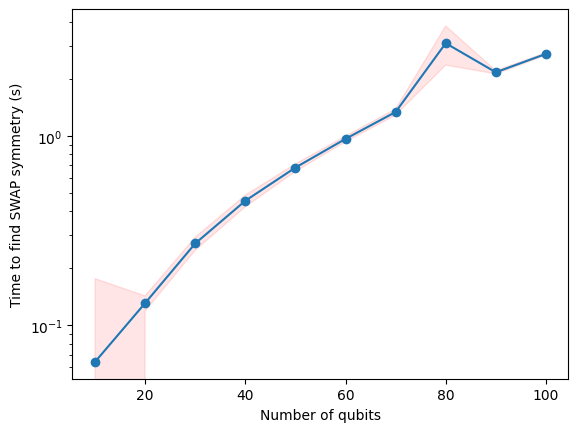

In [3]:
# plot times and variances
import matplotlib.pyplot as plt
plt.semilogy(n_qudits_list, mean_times, marker='o')
# plt.semilogy(n_qudits_list, median_times, marker='x', label='Median')
# fill in area between max and min
# plt.fill_between(n_qudits_list, times_max, times_min, alpha=0.2)
# standard deviation of each n_q
std_dev = np.asarray([np.std(times[i]) for i in range(len(n_qudits_list))])
plt.fill_between(n_qudits_list, mean_times - std_dev, mean_times + std_dev, alpha=0.1, color='red', label='Std Dev')
# plt.legend()
# plt.plot(n_qs, times_max, marker='^', label='Max')
# plt.plot(n_qs, times_min, marker='d', label='Min')
plt.xlabel('Number of qubits')
plt.ylabel('Time to find SWAP symmetry (s)')

In [4]:
np.savez('scripts/personal/Data/swap_symmetry_times.npz', n_qudits=n_qudits_list, mean_times=mean_times, median_times=median_times, times_max=times_max, times_min=times_min, variances=variances)

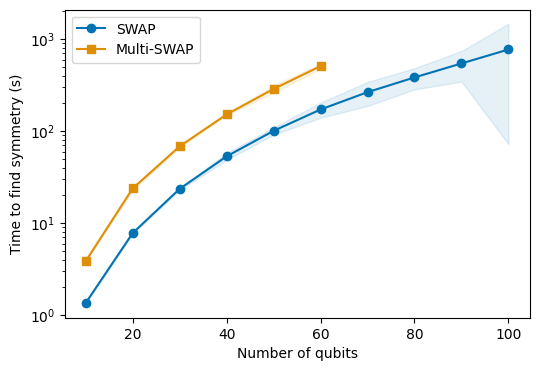

In [26]:
data = np.load('scripts/personal/Data/swap_symmetry_times.npz')

n_qudits = data['n_qudits']
mean_times = data['mean_times']
median_times = data['median_times']
times_max = data['times_max']
times_min = data['times_min']
variances = data['variances']

data2 = np.load('scripts/personal/Data/Mulit_swap_symmetry_times.npz')

n_qudits2 = data2['n_qudits']
mean_times2 = data2['mean_times']
median_times2 = data2['median_times']
times_max2 = data2['times_max']
times_min2 = data2['times_min']
variances2 = data2['variances']

# plot
import matplotlib.pyplot as plt
import seaborn as sns

cols = sns.color_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.semilogy(n_qudits, mean_times, c=cols[0], marker='o', label='SWAP')
ax.semilogy(n_qudits2, mean_times2, c=cols[1], marker='s', label='Multi-SWAP')
# plt.semilogy(n_qudits, median_times, marker='x', label='Median')
# fill in area between max and min
# plt.fill_between(n_qudits, times_max, times_min, alpha=0.2)
# standard deviation of each n_q
std_dev = variances
ax.fill_between(n_qudits, mean_times - std_dev, mean_times + std_dev, alpha=0.1, color=cols[0])
ax.fill_between(n_qudits2, mean_times2 - variances2, mean_times2 + variances2, alpha=0.1, color=cols[1])
# plt.legend()
# plt.plot(n_qs, times_max, marker='^', label='Max')
# plt.plot(n_qs, times_min, marker='d', label='Min')
ax.set_xlabel('Number of qubits')
ax.set_ylabel('Time to find symmetry (s)')
ax.legend()

fig.savefig('scripts/personal/Data/swap_symmetry_times.png', dpi=300)


In [ ]:
# multiswap finder

n_tests = 50
p = 2
n_qudits_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # 

times = []

for n_qudits in n_qudits_list:
    t_each_run = []
    n_paulis = n_qudits * 3 + 10
    dims = [p] * n_qudits
    for _ in range(n_tests):
        
        sym = Circuit(dims, [SWAP(0, 1, p), SWAP(1, 2, p), SWAP(2, 3, p)]).composite_gate()
        # unscrambled H
        H = random_gate_symmetric_hamiltonian(sym, n_qudits, n_paulis, scrambled=False)
        C = Circuit.from_random(1000, H.dimensions).composite_gate()  # scrambling circuit
        H = C.act(H)
        H.weight_to_phase()
        scrambled_sym = Circuit(H.dimensions, [C.inv(), sym, C]).composite_gate()
        assert H.to_standard_form() == scrambled_sym.act(H).to_standard_form(
        ), f"\n{H.to_standard_form().__str__()}\n{sym.act(H).to_standard_form().__str__()}"

        known_F = scrambled_sym.symplectic

        start = time.time()
        symmetries = find_clifford_symmetries(H)
        end = time.time()
        assert len(symmetries) != 0

        for c in symmetries:
            # print(np.all(c.symplectic == known_F) and np.all(
            #     c.phase_vector == scrambled_sym.phase_vector))
            H_s = H.to_standard_form()
            H_out = c.act(H).to_standard_form()
            H_s.weight_to_phase()
            H_out.weight_to_phase()
            assert np.all(H_s.tableau == H_out.tableau)
            assert np.all(H_s.phases == H_out.phases)
            assert np.all(H_s.weights == H_out.weights)
            assert c.act(H).to_standard_form() == H.to_standard_form()
        print('done n_qudits=', n_qudits, ' run number ', _, 'time=', time.time() - start)
        
        t_each_run.append(end - start)
    times.append(t_each_run)

mean_times = [np.mean(t) for t in times]
median_times = [np.median(t) for t in times]
times_max = [np.max(t) for t in times]
times_min = [np.min(t) for t in times]
variances = [np.var(t) for t in times]

np.savez('scripts/personal/Data/Multi_swap_symmetry_times.npz', n_qudits=n_qudits_list, mean_times=mean_times, median_times=median_times, times_max=times_max, times_min=times_min, variances=variances)

done n_qudits= 10  run number  0 time= 3.7456653118133545
done n_qudits= 10  run number  1 time= 4.1703760623931885
done n_qudits= 10  run number  2 time= 4.128698348999023
done n_qudits= 10  run number  3 time= 4.37120509147644
done n_qudits= 10  run number  4 time= 4.00000786781311
done n_qudits= 10  run number  5 time= 3.9401094913482666
done n_qudits= 10  run number  6 time= 3.988173246383667
done n_qudits= 10  run number  7 time= 3.991694688796997
done n_qudits= 10  run number  8 time= 3.8628838062286377
done n_qudits= 10  run number  9 time= 3.87658953666687
done n_qudits= 10  run number  10 time= 4.024330377578735
done n_qudits= 10  run number  11 time= 3.8591501712799072
done n_qudits= 10  run number  12 time= 6.570542097091675
done n_qudits= 10  run number  13 time= 4.050959348678589
done n_qudits= 10  run number  14 time= 4.067127466201782
done n_qudits= 10  run number  15 time= 3.972411632537842
done n_qudits= 10  run number  16 time= 3.794644355773926
done n_qudits= 10  run

Text(0, 0.5, 'Time to find symmetry (s)')

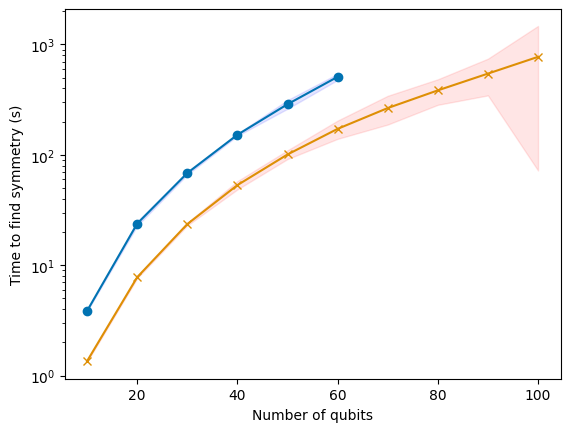

In [11]:
# plot times and variances
import matplotlib.pyplot as plt
import seaborn as sns

cols = sns.color_palette('colorblind')

data_swap = np.load('scripts/personal/Data/swap_symmetry_times.npz')

n_qudits_list_swap = data_swap['n_qudits']
mean_times_swap = data_swap['mean_times']
median_times_swap = data_swap['median_times']
times_max_swap = data_swap['times_max']
times_min_swap = data_swap['times_min']
variances_swap = data_swap['variances']

data_multi_swap = np.load('scripts/personal/Data/Mulit_swap_symmetry_times.npz')

n_qudits_list_multi_swap = data_multi_swap['n_qudits']
mean_times_multi_swap = data_multi_swap['mean_times']    
median_times_multi_swap = data_multi_swap['median_times']
times_max_multi_swap = data_multi_swap['times_max']
times_min_multi_swap = data_multi_swap['times_min']
variances_multi_swap = data_multi_swap['variances']

plt.semilogy(n_qudits_list_multi_swap, mean_times_multi_swap, marker='o', color=cols[0])
plt.semilogy(n_qudits_list_swap, mean_times_swap, marker='x', color=cols[1])
# plt.semilogy(n_qudits_list, median_times, marker='x', label='Median')
# fill in area between max and min
# plt.fill_between(n_qudits_list, times_max, times_min, alpha=0.2)
# standard deviation of each n_q
std_dev = np.asarray([np.std(times[i]) for i in range(len(n_qudits_list))])
plt.fill_between(n_qudits_list_swap, mean_times_swap - variances_swap, mean_times_swap + variances_swap,
 alpha=0.1, color='red')
plt.fill_between(n_qudits_list_multi_swap, mean_times_multi_swap - variances_multi_swap, mean_times_multi_swap + variances_multi_swap,
alpha=0.1, color='blue')
# plt.legend()
# plt.plot(n_qs, times_max, marker='^', label='Max')
# plt.plot(n_qs, times_min, marker='d', label='Min')
plt.xlabel('Number of qubits')
plt.ylabel('Time to find symmetry (s)')


In [ ]:
# complex symmetry finder

n_tests = 10
p = 2
n_qudits_list = [10, 20, 30, 40]  # , 40, 50, 60, 70, 80, 90, 100

times = []

for n_qudits in n_qudits_list:
    t_each_run = []
    n_paulis = n_qudits * 3 + 10
    dims = [p] * n_qudits
    for _ in range(n_tests):
        
        sym = Circuit.from_random(depth=10, dimension=dims).composite_gate()
        # unscrambled H
        H = random_gate_symmetric_hamiltonian(sym, n_qudits, n_paulis, scrambled=False)
        C = Circuit.from_random(1000, H.dimensions).composite_gate()  # scrambling circuit
        H = C.act(H)
        H.weight_to_phase()
        scrambled_sym = Circuit(H.dimensions, [C.inv(), sym, C]).composite_gate()

        # print(H.to_standard_form()[1])
        # print(scrambled_sym.act(H).to_standard_form()[1])


        assert np.all(H.to_standard_form() == scrambled_sym.act(H).to_standard_form()
        ), f"\n{H.to_standard_form().tableau}\n\n\n{sym.act(H).to_standard_form().tableau}"
        # f"\n{H.to_standard_form().__str__()}\n\n\n{sym.act(H).to_standard_form().__str__()}"

        known_F = scrambled_sym.symplectic

        start = time.time()
        # symmetries = find_clifford_symmetries(H)
        F, S, T = min_qudit_clifford_symmetry(H, check_symmetry=True)

        assert qudit_cost(S) <= qudit_cost(sym), f"Expected cost {qudit_cost(sym)}, got {qudit_cost(S)} \n {F.symplectic}"
        print("Qudit cost ", qudit_cost(S))
        print("Max expected qudit cost", qudit_cost(sym))

        print('done n_qudits=', n_qudits, ' run number ', _, 'time=', time.time() - start)
        end = time.time()
        t_each_run.append(end - start)
    times.append(t_each_run)

mean_times = [np.mean(t) for t in times]
median_times = [np.median(t) for t in times]
times_max = [np.max(t) for t in times]
times_min = [np.min(t) for t in times]
variances = [np.var(t) for t in times]


Lmin_star (theory half-dim): 1
Block sizes: [4, 2, 2, 2, 2, 2, 2, 2, 2] Q_alg: 2
Qudit cost  2
Max expected qudit cost 4
done n_qudits= 10  run number  0 time= 7.529858589172363
Lmin_star (theory half-dim): 1
Block sizes: [4, 2, 2, 2, 2, 2, 2, 2, 2] Q_alg: 2
Qudit cost  2
Max expected qudit cost 4
done n_qudits= 10  run number  1 time= 7.674513339996338
Lmin_star (theory half-dim): 1
Block sizes: [4, 2, 2, 2, 2, 2, 2, 2, 2] Q_alg: 2
Qudit cost  2
Max expected qudit cost 4
done n_qudits= 10  run number  2 time= 7.832982778549194
Lmin_star (theory half-dim): 1
Block sizes: [4, 2, 2, 2, 2, 2, 2, 2, 2] Q_alg: 2
Qudit cost  2
Max expected qudit cost 4
done n_qudits= 10  run number  3 time= 8.028517723083496
Lmin_star (theory half-dim): 1
Block sizes: [4, 2, 2, 2, 2, 2, 2, 2, 2] Q_alg: 2
Qudit cost  2
Max expected qudit cost 4
done n_qudits= 10  run number  4 time= 7.7997541427612305
Lmin_star (theory half-dim): 1
Block sizes: [4, 2, 2, 2, 2, 2, 2, 2, 2] Q_alg: 2
Qudit cost  2
Max expected q

In [4]:
import time
import traceback
import multiprocessing as mp

def _run_one_case(q, i, n_qudits, n_paulis, dims, depth=10, scramble_depth=1000):
    """
    Runs a single iteration. Puts a dict result into queue q.
    Put *all* heavy work inside here so the parent can kill it on timeout.
    """
    t0 = time.time()
    try:
        sym = Circuit.from_random(depth=depth, dimensions=dims).composite_gate()

        H = random_gate_symmetric_hamiltonian(sym, n_qudits, n_paulis, scrambled=False)
        C = Circuit.from_random(scramble_depth, H.dimensions).composite_gate()
        H = C.act(H)
        H.weight_to_phase()
        scrambled_sym = Circuit(H.dimensions, [C.inv(), sym, C]).composite_gate()

        exp_cost = qudit_cost(sym)
        print(f"[{i}] Expected max qudit cost: {exp_cost}")
        # keep your check
        assert np.all(H.to_standard_form() == scrambled_sym.act(H).to_standard_form()), (
            f"\n{H.to_standard_form().tableau}\n\n\n{sym.act(H).to_standard_form().tableau}"
        )

        F, S, T = min_qudit_clifford_symmetry(H, check_symmetry=True, decomposition_trials=1000)

        got_cost = qudit_cost(S)
        assert got_cost <= exp_cost, f"Expected cost {exp_cost}, got {got_cost} \n {F.symplectic}"

        q.put({
            "ok": True,
            "i": i,
            "expected_cost": exp_cost,
            "got_cost": got_cost,
            "time": time.time() - t0,
        })
    except Exception as e:
        q.put({
            "ok": False,
            "i": i,
            "time": time.time() - t0,
            "error": repr(e),
            "traceback": traceback.format_exc(),
        })


def run_tests_with_timeout(n_tests, timeout_s, n_qudits, n_paulis, dims, t_each_run):
    for i in range(n_tests):
        q = mp.Queue()
        p = mp.Process(target=_run_one_case, args=(q, i, n_qudits, n_paulis, dims))
        p.start()
        p.join(timeout_s)

        if p.is_alive():
            p.terminate()
            p.join()
            print(f"[{i}] timed out after {timeout_s}s -> skipping")
            continue

        if q.empty():
            print(f"[{i}] finished but produced no result -> skipping")
            continue

        res = q.get()

        if not res["ok"]:
            # choose your policy:
            # 1) fail fast:
            raise RuntimeError(f"Case {i} failed: {res['error']}\n{res['traceback']}")
            # 2) or just log+continue:
            # print(f"[{i}] failed: {res['error']}\n{res['traceback']}")
            # continue

        print(f"[{i}] Max expected qudit cost {res['expected_cost']}")
        print(f"[{i}] Qudit cost {res['got_cost']}")
        print(f"[{i}] done n_qudits={n_qudits} time={res['time']:.3f}s")
        t_each_run.append(res["time"])


# complex symmetry finder

n_tests = 50
p = 2
n_qudits_list = [6]  # , 40, 50, 60, 70, 80, 90, 100

times = []

for n_qudits in n_qudits_list:
    t_each_run = []
    n_paulis = n_qudits * 2 + 1
    dims = [p] * n_qudits
    run_tests_with_timeout(
        n_tests=n_tests,
        timeout_s=30,
        n_qudits=n_qudits,
        n_paulis=n_paulis,
        dims=dims,
        t_each_run=t_each_run,
    )
    times.append(t_each_run)




[0] Expected max qudit cost: 2
[phase] qubit fallback: residual has odd entries, cannot fix
Got symmetry - decomposing
Lmin_star (theory half-dim): 1
Block sizes: [10, 2] Q_alg: 5


RuntimeError: Case 0 failed: AssertionError('Expected cost 2, got 5 \n [[1 0 0 0 0 0 0 0 0 0 0 0]\n [1 0 1 0 1 1 0 1 0 0 1 1]\n [0 0 1 0 0 0 0 0 0 0 0 0]\n [0 0 0 1 0 0 0 0 0 0 0 0]\n [1 1 1 0 0 1 0 1 0 0 1 1]\n [1 1 1 0 1 0 0 1 0 0 1 1]\n [1 1 1 0 1 1 1 1 0 0 1 1]\n [1 1 1 0 1 1 0 0 0 0 1 1]\n [1 1 1 0 1 1 0 1 1 0 1 1]\n [0 0 0 0 0 0 0 0 0 1 0 0]\n [1 1 1 0 1 1 0 1 0 0 0 1]\n [1 1 1 0 1 1 0 1 0 0 1 0]]')
Traceback (most recent call last):
  File "/tmp/ipykernel_828515/340129159.py", line 30, in _run_one_case
    assert got_cost <= exp_cost, f"Expected cost {exp_cost}, got {got_cost} \n {F.symplectic}"
           ^^^^^^^^^^^^^^^^^^^^
AssertionError: Expected cost 2, got 5 
 [[1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 1 0 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 1 0 0 1 1]
 [1 1 1 0 1 0 0 1 0 0 1 1]
 [1 1 1 0 1 1 1 1 0 0 1 1]
 [1 1 1 0 1 1 0 0 0 0 1 1]
 [1 1 1 0 1 1 0 1 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [1 1 1 0 1 1 0 1 0 0 0 1]
 [1 1 1 0 1 1 0 1 0 0 1 0]]
